In [1]:
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

%matplotlib inline

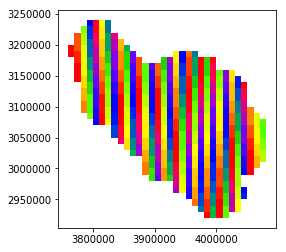

In [25]:
belgium = gpd.read_file("/Users/brunolannoo/Downloads/Belgium_shapefile/be_10km.shp")

belgium.plot(cmap='prism', figsize=(20, 12))

In [17]:
gpd.datasets.get_path('naturalearth_lowres')

'/Users/brunolannoo/.virtualenvironment/experimental/lib/python3.6/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

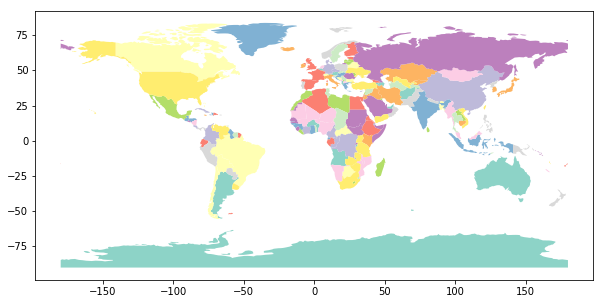

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot(cmap='Set3', figsize=(10, 6))

In [4]:
# reading the JSON data using json.load()
file = './data/GoogleLocation2018.json'
with open(file) as train_file:
    data_json = json.load(train_file)
    
df = pd.DataFrame({'raw': data_json['locations']})

In [5]:
df

,raw
0,"{'timestampMs': '1535206580750', 'latitudeE7':..."
1,"{'timestampMs': '1535206557560', 'latitudeE7':..."
2,"{'timestampMs': '1535206542536', 'latitudeE7':..."
3,"{'timestampMs': '1535206522420', 'latitudeE7':..."
4,"{'timestampMs': '1535206502307', 'latitudeE7':..."
5,"{'timestampMs': '1535206482155', 'latitudeE7':..."
6,"{'timestampMs': '1535206462112', 'latitudeE7':..."
7,"{'timestampMs': '1535206441913', 'latitudeE7':..."
8,"{'timestampMs': '1535206421793', 'latitudeE7':..."
9,"{'timestampMs': '1535206401790', 'latitudeE7':..."


In [6]:
# Extract the base data
df['timeMs'] = df.apply(lambda row: int(row.raw['timestampMs']), axis=1)
df['lat'] = df.apply(lambda row: row.raw['latitudeE7'] / 10_000_000, axis=1)
df['lon'] = df.apply(lambda row: row.raw['longitudeE7'] / 10_000_000, axis=1)

df.drop(columns='raw', inplace=True)
# Derivatives
df['duration'] = (df.timeMs.shift(1) - df.timeMs.shift(-1))/ 2 / (1000*60*60)

In [7]:
df

,timeMs,lat,lon,duration
0,1535206580750,50.875791,4.690414,NaN
1,1535206557560,50.875627,4.690521,0.005307
2,1535206542536,50.875710,4.690462,0.004881
3,1535206522420,50.875730,4.690451,0.005587
4,1535206502307,50.875732,4.690444,0.005592
5,1535206482155,50.875730,4.690439,0.005583
6,1535206462112,50.875718,4.690452,0.005589
7,1535206441913,50.875723,4.690457,0.005600
8,1535206421793,50.875726,4.690439,0.005573
9,1535206401790,50.875729,4.690435,0.005582


In [8]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Setting the geometry by hand: http://geopandas.org/projections.html
gdf.crs = {'init' :'epsg:4326'}

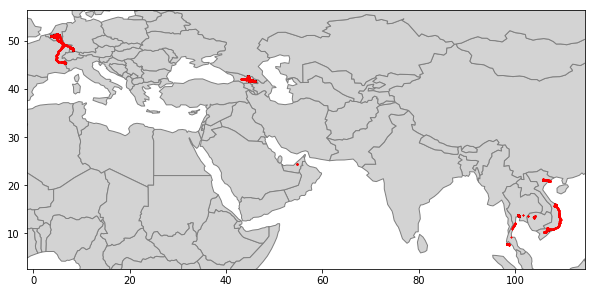

In [13]:
gdf.plot(ax=world.plot(facecolor='lightgray', edgecolor='gray', figsize=(10, 6)),
             marker='o', color='red', markersize=0.2);

bounds = gdf.geometry.bounds

plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

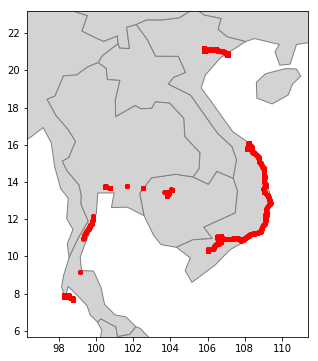

In [14]:
gdf.plot(ax=world.plot(facecolor='lightgray', edgecolor='gray', figsize=(10, 6)),
             marker='o', color='red', markersize=15);

bounds = gdf[gdf.lon > 80].geometry.bounds

plt.xlim([bounds.minx.min()-2, bounds.maxx.max()+2])
plt.ylim([bounds.miny.min()-2, bounds.maxy.max()+2]);

In [15]:
gdf = gpd.sjoin(gdf, world, how='inner', op='intersects')

gdf.drop(columns='index_right', inplace=True)

gdf.rename(index=str, columns={'name': 'country'}, inplace=True)

In [16]:
country_summary = gdf.groupby('country').agg({'duration': 'sum'})

tot_duration = country_summary.duration.sum()

country_summary['%'] = country_summary.apply(lambda row: row.duration/tot_duration * 100, axis=1)

country_summary.sort_values('duration', ascending=False)

,duration,%
country,,
Belgium,4556.225616,81.449847
Georgia,399.439984,7.140631
Vietnam,191.278208,3.419405
France,185.268204,3.311967
Thailand,127.139983,2.272831
Cambodia,73.496501,1.313868
Germany,44.373060,0.793240
United Arab Emirates,11.283910,0.201718
Luxembourg,3.259438,0.058268
